In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('45 channel 1sec alphapower with labels.csv')


print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (8391, 46)


,0.99694,1.2771,1.29,0.16234,0.21899,0.63294,1.8593,2.4524,0.18744,0.59947,0.76399,2.4999,0.20165,0.64587,2.4696,0.30758,0.0086502,0.75937,0.80735,0.44883,0.2202,0.048213,0.56816,2.22,0.13759,0.22783,2.3247,3.8245,0.16294,0.45981,0.63093,2.5048,0.22467,0.6429,2.6522,1.4054,0.0033433,3.0989,1.9315,0.029908,0.94401,0.31607,0.021917,0.28851,1.4024,1
0,1.18280,1.92420,2.89950,1.13280,1.13810,0.83158,1.47320,2.17720,1.29650,0.87671,0.81847,1.99860,1.26430,1.00850,1.06010,0.14574,0.008549,0.29081,1.09880,0.26210,0.067930,0.011935,0.49663,1.23840,1.16450,1.17330,1.85330,5.24300,1.17210,1.02840,0.90230,1.82280,1.02210,0.85610,1.78340,2.27350,0.028813,0.77116,1.8169,0.022705,0.97292,0.11359,0.011999,0.22265,1.56620,1
1,0.45902,0.63984,0.52790,0.43303,0.32893,0.30588,0.39026,0.64604,0.33423,0.36588,0.45248,0.70728,0.39669,0.34817,1.92130,0.10301,0.012467,0.92817,1.10570,0.15010,0.090113,0.022224,0.93769,2.64810,0.30824,0.32064,0.40061,1.83140,0.40939,0.28916,0.28781,0.47195,0.41709,0.34250,0.66613,0.22755,0.004028,1.53380,1.1425,0.071510,1.17730,0.16136,0.028611,0.70938,1.59530,1
2,0.25135,0.18315,0.32631,0.71012,0.81870,0.93663,0.74767,1.03150,0.96265,1.03680,1.04650,0.91701,0.47774,0.92116,1.96730,0.14023,0.021927,0.53291,0.89489,0.36790,0.202050,0.024962,0.60279,1.31290,0.79119,0.64746,0.58280,0.66389,0.81884,0.85160,0.91678,0.75924,0.65891,1.02550,1.16850,0.40159,0.011451,1.52500,1.9702,0.028340,1.48150,0.19290,0.026342,0.38661,1.17610,1
3,1.80050,1.06440,1.34030,0.38149,0.34061,0.34281,0.65299,0.94472,0.36371,0.36508,0.35928,1.01510,0.38112,0.42390,0.87211,0.15557,0.021016,0.41830,1.02800,0.23435,0.135650,0.027006,0.68628,1.39610,0.36923,0.46516,0.87598,3.07020,0.35304,0.34103,0.40550,0.74733,0.34487,0.45965,0.76641,0.67482,0.005014,0.64233,1.3997,0.017446,0.96297,0.14542,0.047650,0.51324,1.81600,1
4,0.99437,0.36646,0.49250,0.50493,0.58822,0.67950,1.59060,1.88620,0.31023,0.69369,0.69312,2.07770,0.37823,0.72718,1.23070,0.29847,0.031051,0.66862,1.08450,0.46272,0.122200,0.018029,0.56068,0.74914,0.43424,0.47597,1.50360,2.73530,0.65000,0.71446,0.57677,1.86690,0.39865,0.73359,2.01420,0.50678,0.021391,1.45460,2.2594,0.033876,1.02010,0.26510,0.013233,0.52880,0.95201,1




**Labelling COLUMNS**

In [15]:
print(df.columns)

Index(['0.99694', '1.2771', '1.29', '0.16234', '0.21899', '0.63294', '1.8593',
       '2.4524', '0.18744', '0.59947', '0.76399', '2.4999', '0.20165',
       '0.64587', '2.4696', '0.30758', '0.0086502', '0.75937', '0.80735',
       '0.44883', '0.2202', '0.048213', '0.56816', '2.22', '0.13759',
       '0.22783', '2.3247', '3.8245', '0.16294', '0.45981', '0.63093',
       '2.5048', '0.22467', '0.6429', '2.6522', '1.4054', '0.0033433',
       '3.0989', '1.9315', '0.029908', '0.94401', '0.31607', '0.021917',
       '0.28851', '1.4024', '1'],
      dtype='object')


In [16]:
new_names = {'0.99694':'a', '1.2771':'b', '1.29':'c', '0.16234':'cd', '0.21899':'d','0.63294':'de','1.8593':'e','2.4524':'f','0.18744':'g',
       '0.59947':'l', '0.76399':'m', '2.4999':'n', '0.20165':'o', '0.64587':'p', '2.4696':'q', '0.30758':'r',
       '0.0086502':'s', '0.75937':'t', '0.80735':'u', '0.44883':'v', '0.2202':'w', '0.048213':'x', '0.56816':'y',
       '2.22':'z', '0.13759':'aa', '0.22783':'bb', '2.3247':'cc', '3.8245':'dd', '0.16294':'ee',
       '0.45981':'ff', '0.63093':'gg', '2.5048':'hh', '0.22467':'ii', '0.6429':'jj', '2.6522':'kk',
       '1.4054':'ll', '0.0033433':'mm', '3.0989':'nn', '1.9315':'oo', '0.029908':'pp', '0.94401':'qq',
       '0.31607':'rr','0.021917':'j',
       '0.28851':'k','1.4024':'h','1':'labels'}
df= df.rename(index=str, columns=new_names)

***Checking any null Values***

In [17]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8391 entries, 0 to 8390
Data columns (total 46 columns):
a         8391 non-null float64
b         8391 non-null float64
c         8391 non-null float64
cd        8391 non-null float64
d         8391 non-null float64
de        8391 non-null float64
e         8391 non-null float64
f         8391 non-null float64
g         8391 non-null float64
l         8391 non-null float64
m         8391 non-null float64
n         8391 non-null float64
o         8391 non-null float64
p         8391 non-null float64
q         8391 non-null float64
r         8391 non-null float64
s         8391 non-null float64
t         8391 non-null float64
u         8391 non-null float64
v         8391 non-null float64
w         8391 non-null float64
x         8391 non-null float64
y         8391 non-null float64
z         8391 non-null float64
aa        8391 non-null float64
bb        8391 non-null float64
cc        8391 non-null float64
dd        8391 non-null float64
ee

In [18]:
pd.set_option('display.max_columns', None)
print(df.describe())



                 a            b            c           cd            d  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean      4.680212     4.266713     4.358381     9.996456     6.295796   
std       6.823723     6.222283     5.658669    13.960113     9.518230   
min       0.082963     0.122500     0.088702     0.048642     0.052602   
25%       1.349850     1.238600     1.513100     2.677600     1.640950   
50%       2.557800     2.266000     2.703100     5.647600     3.423300   
75%       5.258750     4.585100     5.087350    11.642500     7.155000   
max     113.930000    78.915000   148.430000   213.700000   197.330000   

                de            e            f            g            l  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean      6.869423     6.545154     8.302750     8.473059     5.647723   
std      10.746785    10.680664     9.936116    12.677910     8.453658   
min       0.071089     0.171790     0

***spliting the file in the data and target class***

In [19]:
data = df.iloc[:,:-1].values.tolist()
target = df.iloc[:,-1].tolist()

In [20]:

print(data)
print(target)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**heatmap**

Text(0.5, 1.0, 'Correlation of Variables')

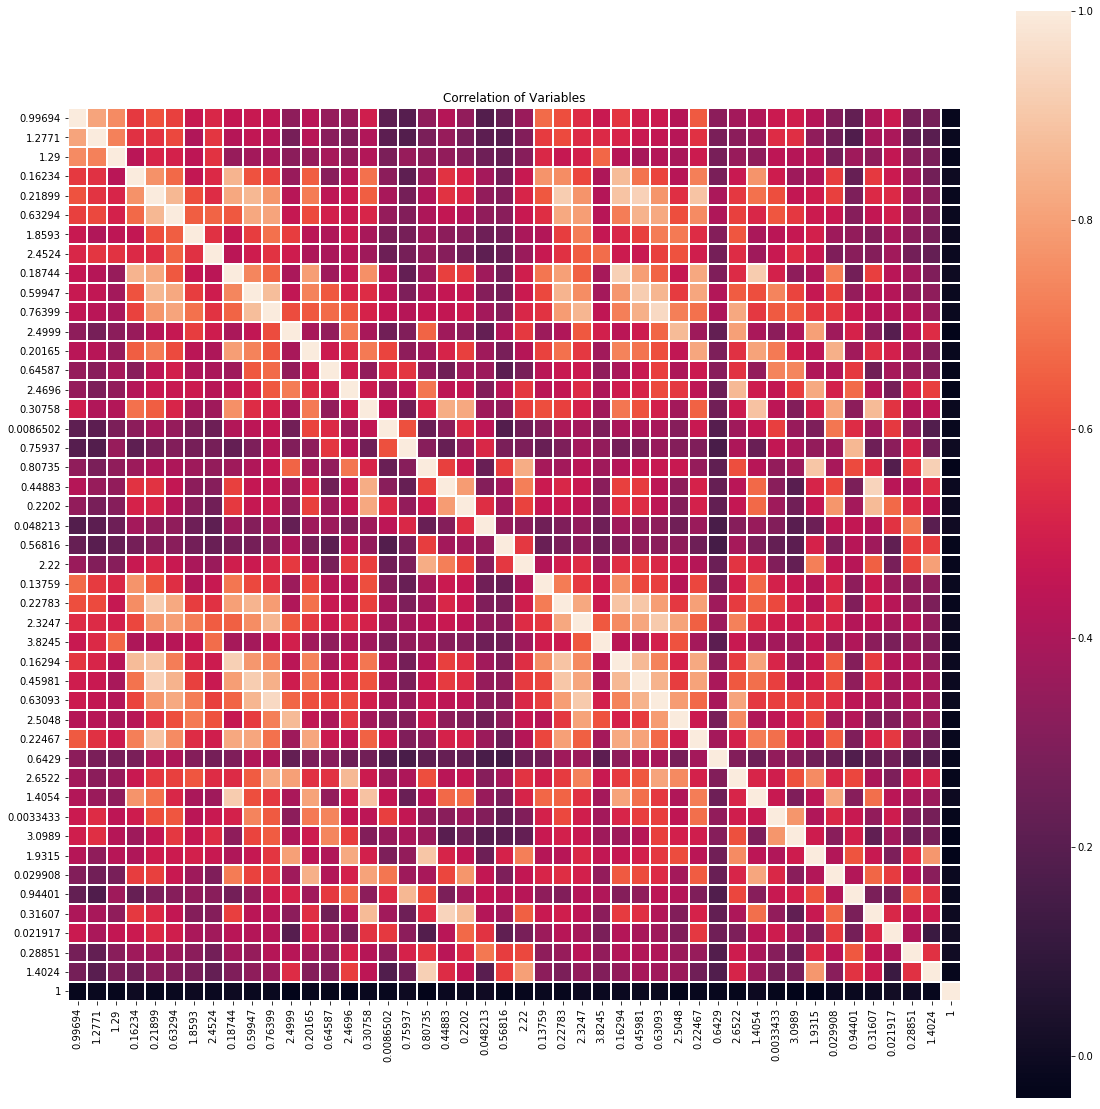

In [13]:
col_list = df.columns
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df[col_list].corr(),square=True,linewidths=1)
plt.title('Correlation of Variables')

**Normalizing**

In [21]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x =df[df.columns[:46]]
y =df.labels
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)

 **Select numerical columns which needs to be normalized**

In [22]:
train_norm = x_train[x_train.columns[0:20]]
test_norm = x_test[x_test.columns[0:20]]

**Normalize Training Data**

In [23]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

**Converting numpy array to dataframe**

In [24]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

             a         b         c        cd         d        de         e  \
1585 -0.574809 -0.478664 -0.259870 -0.628864 -0.154049 -0.297376 -0.662377   
992   1.025842  3.236589  1.417560  1.757329  0.675966  3.868469  0.696159   
8204 -0.576262 -0.397916 -0.196709  0.137886 -0.135022  0.242636  0.167129   
4674 -0.373001 -0.512045 -0.423963 -0.412675 -0.327287 -0.311574 -0.328459   
3593 -0.346911 -0.239245 -0.323992  0.013752 -0.343723 -0.007083  0.614490   

             f         g         l         m         n         o         p  \
1585 -0.750731 -0.316596  0.262810 -0.513902 -0.572479 -0.178767 -0.228254   
992   3.211227 -0.373047  0.569718 -0.160057 -0.452776  1.258622 -0.032740   
8204  0.278209  0.214960  0.295363  0.489236 -0.040465 -0.084042  0.389735   
4674 -0.636181 -0.603127 -0.435563 -0.216817 -0.277460 -0.142008 -0.442595   
3593 -0.053239 -0.282781 -0.414003  0.280569  0.043290 -0.332850 -0.125269   

             q         r         s         t         u        

**Normalize Testing Data by using mean and SD of training set**

In [25]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

             a         b         c        cd         d        de         e  \
1585 -0.574809 -0.478664 -0.259870 -0.628864 -0.154049 -0.297376 -0.662377   
992   1.025842  3.236589  1.417560  1.757329  0.675966  3.868469  0.696159   
8204 -0.576262 -0.397916 -0.196709  0.137886 -0.135022  0.242636  0.167129   
4674 -0.373001 -0.512045 -0.423963 -0.412675 -0.327287 -0.311574 -0.328459   
3593 -0.346911 -0.239245 -0.323992  0.013752 -0.343723 -0.007083  0.614490   

             f         g         l         m         n         o         p  \
1585 -0.750731 -0.316596  0.262810 -0.513902 -0.572479 -0.178767 -0.228254   
992   3.211227 -0.373047  0.569718 -0.160057 -0.452776  1.258622 -0.032740   
8204  0.278209  0.214960  0.295363  0.489236 -0.040465 -0.084042  0.389735   
4674 -0.636181 -0.603127 -0.435563 -0.216817 -0.277460 -0.142008 -0.442595   
3593 -0.053239 -0.282781 -0.414003  0.280569  0.043290 -0.332850 -0.125269   

             q         r         s         t         u        

**Support vector machine**

In [26]:
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
def svm_classifier(): 
    file_x = '45 channel 1sec alphapower.csv'
    file_y = 'Label.csv'
    
    X = data
    y = target
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
   
    	

     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    X_test = sc.transform(X_test)

    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 50)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score : ")
    print(accuracy_score(y_test, y_predict)*100)
    
if __name__ == '__main__':
    svm_classifier()

[[2816  103]
 [2023   93]]
Accuracy score : 
57.77557100297914


In [28]:
pip install --force-reinstall tensorflow

  Using cached https://files.pythonhosted.org/packages/34/d5/ce8c17971067c0184c9045112b755be5461d5ce5253ef65a367e1298d7c5/tensorflow-2.1.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/40/23/53ffe290341cd0855d595b0a2e7485932f473798af173bbe3a584b99bb06/tensorboard-2.1.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/65/eb/1f97cb97bfc2390a276969c6fae16075da282f5058082d4cb10c6c5c1dba/six-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pytho

tables 3.5.1 requires mock>=2.0, which is not installed.
spyder 3.3.3 requires pyqt5<=5.12; python_version >= "3", which is not installed.
astroid 2.2.5 requires typed-ast>=1.3.0; implementation_name == "cpython", which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\bme-4\\anaconda3\\lib\\site-packages\\~-mpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



**sequential model**

In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
   



model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=25,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
5873/5873 [==============================] - 5s 881us/step - loss: 1.1374 - acc: 0.5229
Epoch 2/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.8345 - acc: 0.5445
Epoch 3/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.7728 - acc: 0.5668
Epoch 4/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.7382 - acc: 0.5779
Epoch 5/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.7060 - acc: 0.5973
Epoch 6/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.6818 - acc: 0.6310
Epoch 7/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.6635 - acc: 0.6383
Epoch 8/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.6474 - acc: 0.6542
Epoch 9/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.6156 - acc: 0.6876
Epoch 10/25
5873/5873 

**LSTM MODELLING**

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=2, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=16)

Epoch 1/10
5873/5873 [==============================] - 182s 31ms/step - loss: 0.0091 - acc: 0.9985
Epoch 2/10
5873/5873 [==============================] - 180s 31ms/step - loss: 1.1062e-07 - acc: 1.00000s - loss: 1.1063e-07 - ac - ETA: 0s - loss: 1.1062e-07 - acc: 1.00
Epoch 3/10
5873/5873 [==============================] - 180s 31ms/step - loss: 1.1013e-07 - acc: 1.0000
Epoch 4/10
5873/5873 [==============================] - 178s 30ms/step - loss: 1.0831e-07 - acc: 1.0000
Epoch 5/10
5873/5873 [==============================] - 177s 30ms/step - loss: 1.0872e-07 - acc: 1.00002s - loss: 1.0875e-07 - acc: 1. 
Epoch 6/10
5873/5873 [==============================] - 177s 30ms/step - loss: 1.0821e-07 - acc: 1.0000
Epoch 7/10
5873/5873 [==============================] - 179s 30ms/step - loss: 1.0817e-07 - acc: 1.00001s -
Epoch 8/10
5873/5873 [==============================] - 175s 30ms/step - loss: 1.0827e-07 - acc: 1.00000s - loss: 1.0827e-07 - acc: 1.00 - ETA: 0s - loss: 1.0828e-07 - 
Epoc